# ISYE 6740 - Spectral Clustering, PCA
## Homework 2 
## Zi Liu

### Section 1. Spectral clustering

#### Question 1. Assume the number of clusters in the graph is $k$. Explain the meaning of $k$ here intuitively.

#### Answer: k is the number of connected components we assigned to the dataset. In this polictical blog example, it is the number of "communities" where the blog-sites are connected with each other. 

#### Question 2. Use spectral clustering to and the k = 2; 5; 10; 20 clusters in the network of political blogs

#### In order to build the spectral clustering, first I will need to transform the data into eigenvectors. The process is shown in the following:

In [2]:
#import all necesary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
import networkx as nx

##### Step 1: Read in the data

In [3]:
node = pd.read_csv('data/nodes.txt', sep='\t', header=None)
edge = pd.read_csv('data/edges.txt', sep='\t', header=None)

print('Node:')
display(node.head())
print('Edge:')
display(edge.head())

Node:


,0,1,2,3
0,1,100monkeystyping.com,0,Blogarama
1,2,12thharmonic.com/wordpress,0,BlogCatalog
2,3,40ozblog.blogspot.com,0,"Blogarama,BlogCatalog"
3,4,4lina.tblog.com,0,Blogarama
4,5,750volts.blogspot.com,0,Blogarama


Edge:


,0,1
0,267,1394
1,267,483
2,267,1051
3,904,1479
4,904,919


In [4]:
#Changing the index start with 0:

nodes = node.copy()
edges = edge.copy()

nodes.drop([0],axis = 1)
nodes[0]= nodes.index

edges[0] = edges[0]-1
edges[1] = edges[1]-1

print('Changing the index start with 0:')
print('Nodes:')
display(nodes.head())
print('Edges:')
display(edges.head())


Changing the index start with 0:
Nodes:


,0,1,2,3
0,0,100monkeystyping.com,0,Blogarama
1,1,12thharmonic.com/wordpress,0,BlogCatalog
2,2,40ozblog.blogspot.com,0,"Blogarama,BlogCatalog"
3,3,4lina.tblog.com,0,Blogarama
4,4,750volts.blogspot.com,0,Blogarama


Edges:


,0,1
0,266,1393
1,266,482
2,266,1050
3,903,1478
4,903,918


In [5]:
#Create a list for all the edge pairs, which are saved as turple
edges_pair = []
for i in range(len(edges)):
    edges_pair.append((edges.iloc[i,0],edges.iloc[i,1]))
       
# len(edges_pair)

In [6]:
#Create a graph object G
G = nx.Graph()
G.add_edges_from(edges_pair)


In [7]:
#Find out the numbers of components in this graph
len(list(nx.connected_components(G)))

2

##### Observation: By printing out the 2 conpoments in the list 'nx.connected_components(G)' , I found that the second one are totally disconnected and formed its own component. They will not be considered in the clustering process and therefore I will remove them. 

##### In addition, I will build another array to save the nodes of the first component only.

In [8]:
# list(nx.connected_components(G))[0]
list(nx.connected_components(G))[1]

{181, 665}

In [9]:
#remove the disconnected edge_pair, save a copy
edges_pair.remove((181,665))
edges_pair1 = edges_pair.copy()

In [10]:
#update:
#edges to edges1 ->list
#nodes to nodes1 ->np.array

edges1= list(nx.connected_components(G))[0]
nodes1 = np.array(list(edges1))


In [11]:
# #Update the graph to graph1
# G1 = nx.Graph()
# G1.add_edges_from(edges_pair1)


##### Step2 : Build an adjacency matrix A

##### Note The graph that is creating is undirected and unweighted. Thus it will be symmetric and contain only 1s and 0s.


In [12]:
#print out the edges_pair1 for my own reference
edges_pair1 = pd.DataFrame(edges_pair1)
edges_pair1[:5]

,0,1
0,266,1393
1,266,482
2,266,1050
3,903,1478
4,903,918


##### adjacency matrix A:

In [13]:
n = nodes1.shape[0]

A = pd.DataFrame(np.zeros(shape=(n,n)), index=nodes1, columns=nodes1)

for i in range(edges_pair1.shape[0]):
    point0 = edges_pair1.iloc[i,0]
    point1 = edges_pair1.iloc[i,1]
    A.loc[point0,point1] = 1
    A.loc[point1,point0] = 1
    
# display(A.loc[1132,1151])
display(A)

,0,1,4,5,6,7,8,9,10,11,...,1478,1480,1481,1483,1484,1485,1486,1487,1488,1489
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


##### Step3 : Build a degree matrix D

##### Note step 3-5 refer to: https://towardsdatascience.com/spectral-clustering-aba2640c0d5b

In [14]:
D = np.diag(A.sum(axis = 1))
D = pd.DataFrame(D,index = nodes1, columns = nodes1)
display(D)

,0,1,4,5,6,7,8,9,10,11,...,1478,1480,1481,1483,1484,1485,1486,1487,1488,1489
0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0
1487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0


##### Step 4: Graph Laplacian

In [15]:
L = D-A
display(L)

,0,1,4,5,6,7,8,9,10,11,...,1478,1480,1481,1483,1484,1485,1486,1487,1488,1489
0,26.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0
1487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0
1488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,18.0,0.0


##### Step 5: Calculate eigenvalues and eigenvectors, sort the eigenvalues in ascending order and then the eigenvectors by the corresponding sorted eigenvalue.

In [16]:
eigen_values, eigen_vectors = np.linalg.eig(L)
eigen_vectors = eigen_vectors[:,np.argsort(eigen_values)]
eigen_values = eigen_values[np.argsort(eigen_values)]


##### Plot the eigen_values for my own reference:

/home/zi/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


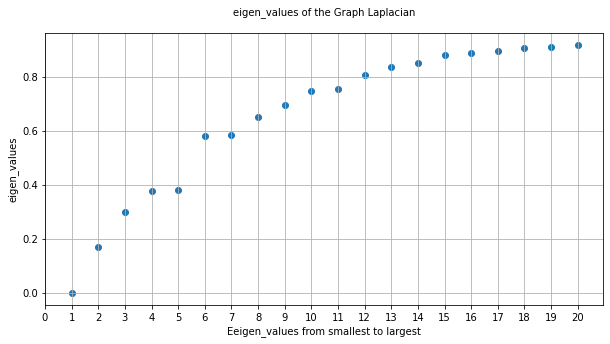

In [17]:
plt.figure(figsize=(10,5))
plt.title('eigen_values of the Graph Laplacian\n', fontsize=10)
plt.scatter(np.arange(1,21), eigen_values[:20])
plt.xticks(np.arange(0,21));
plt.xlabel("Eeigen_values from smallest to largest")
plt.ylabel('eigen_values')
plt.yticks(np.arange(0,1,0.2));
plt.grid(which='both')

##### Now I start to run the k-means algorithms dveloped from HW1

In [18]:
from Zi_Liu_HW1_algo import k_means
np.random.seed(123)

In [19]:
#Create a dictionary to store the political orientation for the nodes that have edges
dict_mapping = {}
for i in range(len(nodes1)):
    temp = nodes1[i]
    dict_mapping[temp] = nodes.loc[temp][2]

In [20]:
#Build a function to calculate the results of the spectral cluster algorithms

def print_spectral_cluster_result(k,node_list,kmean_algo,dict_mapping):
    '''
    k ptype: int
    node_list ptype: numpy.ndarray
    kmean_algo ptype: tuple
    dict_mapping: dict
    rtype: pandas.dataframe
    '''
    
    #Create a dataframe to store the node, 
    #its assoicated label which are assigned by k-means,
    #and its politial orientation found from dict_mapping
    
    labels = kmean_algo[1]
    
    result_table = pd.DataFrame(np.zeros(shape=(len(node_list),3)), index=node_list, columns=['node','cluster label','political orien'],dtype=int)
    result_table['node']=node_list
    result_table['cluster label']=labels

    for i in range(len(node_list)):
        temp = node_list[i]
        result_table.loc[temp]['political orien']= dict_mapping[temp]
    
    #Build a dataframe used as privot table based on 'result_table'
    n_by_label =result_table.groupby(['cluster label','political orien']).count().reset_index().rename(columns={'node': 'count'})
    
    #Print out the result
#     for i in range(len(n_by_label)):
#         cluster= n_by_label.loc[i][0]
#         polit= n_by_label.loc[i][1]
#         cnt = n_by_label.loc[i][2]
#         print("When K is {}, at cluster {}, political orientation at {}, have total count: {}".format(k,cluster,polit,cnt))
    
    return n_by_label

In [21]:
#Build a function for calculating the mismatch rate

def mismatch_rate(n_by_label):
    '''
    n_by_label ptype: pd.DataFrame
    
    '''
    n_by_label_sum = n_by_label.groupby(['cluster label'])['count'].sum().reset_index().rename(columns={'count': 'sum'})
    n_by_label_min = n_by_label.groupby(['cluster label'])['count'].min().reset_index().rename(columns={'count': 'min'}) 
    
    for i in range(len(n_by_label_sum)):
        cluster_label = n_by_label_sum.loc[i][0]
    
        if n_by_label_min.loc[i][1] == n_by_label_sum.loc[i][1]:
            mismatch = 0
        else:
            mismatch = np.round((n_by_label_min.loc[i][1] / n_by_label_sum.loc[i][1])*100,2)

        print('For cluster label {}, mismatch rate is at {}%:'.format(cluster_label, mismatch))

##### Create the k-means algorithms based on K

In [22]:
#when K =2, 5, 10, 20 repectively:
K2 =2
K5 =5
K10 =10
K20 =20

#run the k-means
a2 = k_means(eigen_vectors,K2,max_iteration= 100,seedNum=123)
a5 = k_means(eigen_vectors,K5,max_iteration= 100,seedNum=123)
a10 = k_means(eigen_vectors,K10,max_iteration= 100,seedNum=123)
a20 = k_means(eigen_vectors,K20,max_iteration= 100,seedNum=123)


/home/zi/DS-Projects/OMSA-IYSE6740/HW2 -Spectral Clusting -PCA/Zi_Liu_HW1_algo.py:90: ComplexWarning: Casting complex values to real discards the imaginary part
  centroids[i, :] = data[index, :]
/home/zi/DS-Projects/OMSA-IYSE6740/HW2 -Spectral Clusting -PCA/Zi_Liu_HW1_algo.py:113: ComplexWarning: Casting complex values to real discards the imaginary part
  c[i,:] = np.mean(pts_in_cluster,axis = 0)


number of iterations: 4
number of iterations: 9
number of iterations: 17
number of iterations: 10


#### Question 2+ 3:  Print out the calculated results from spectral clustering algorithms and the mismatch rate

In [23]:
#For k = 2:
print_a2 = print_spectral_cluster_result(K2,nodes1,a2,dict_mapping)
display(print_a2)
mismatch_rate(print_a2)


,cluster label,political orien,count
0,0,1,15
1,1,0,586
2,1,1,621


For cluster label 0, mismatch rate is at 0%:
For cluster label 1, mismatch rate is at 48.55%:


In [24]:
#For k = 5:
print_a5 = print_spectral_cluster_result(K5,nodes1,a5,dict_mapping)
display(print_a5)
mismatch_rate(print_a5)


,cluster label,political orien,count
0,0,1,15
1,1,0,485
2,1,1,613
3,2,0,71
4,2,1,4
5,3,1,2
6,4,0,30
7,4,1,2


For cluster label 0, mismatch rate is at 0%:
For cluster label 1, mismatch rate is at 44.17%:
For cluster label 2, mismatch rate is at 5.33%:
For cluster label 3, mismatch rate is at 0%:
For cluster label 4, mismatch rate is at 6.25%:


In [25]:
#For k = 10:
print_a10 = print_spectral_cluster_result(K10,nodes1,a10,dict_mapping)
display(print_a10)
mismatch_rate(print_a10)


,cluster label,political orien,count
0,0,1,15
1,1,0,239
2,1,1,1
3,2,0,19
4,2,1,1
5,3,1,2
6,4,0,34
7,4,1,2
8,5,0,42
9,6,0,217


For cluster label 0, mismatch rate is at 0%:
For cluster label 1, mismatch rate is at 0.42%:
For cluster label 2, mismatch rate is at 5.0%:
For cluster label 3, mismatch rate is at 0%:
For cluster label 4, mismatch rate is at 5.56%:
For cluster label 5, mismatch rate is at 0%:
For cluster label 6, mismatch rate is at 28.0%:
For cluster label 7, mismatch rate is at 0%:
For cluster label 8, mismatch rate is at 3.57%:
For cluster label 9, mismatch rate is at 5.71%:


In [26]:
#For k = 20:
print_a20 = print_spectral_cluster_result(K20,nodes1,a20,dict_mapping)
display(print_a20)
mismatch_rate(print_a20)


,cluster label,political orien,count
0,0,1,16
1,1,0,10
2,1,1,12
3,2,0,8
4,2,1,1
5,3,1,2
6,4,1,5
7,5,0,18
8,6,0,212
9,6,1,532


For cluster label 0, mismatch rate is at 0%:
For cluster label 1, mismatch rate is at 45.45%:
For cluster label 2, mismatch rate is at 11.11%:
For cluster label 3, mismatch rate is at 0%:
For cluster label 4, mismatch rate is at 0%:
For cluster label 5, mismatch rate is at 0%:
For cluster label 6, mismatch rate is at 28.49%:
For cluster label 7, mismatch rate is at 0%:
For cluster label 8, mismatch rate is at 4.0%:
For cluster label 9, mismatch rate is at 3.85%:
For cluster label 10, mismatch rate is at 5.56%:
For cluster label 11, mismatch rate is at 0%:
For cluster label 12, mismatch rate is at 0%:
For cluster label 13, mismatch rate is at 0%:
For cluster label 14, mismatch rate is at 38.1%:
For cluster label 15, mismatch rate is at 0%:
For cluster label 16, mismatch rate is at 0.85%:
For cluster label 17, mismatch rate is at 0%:
For cluster label 18, mismatch rate is at 0%:


#### Question 4 Tune your k and find the number of clusters to achieve a reasonably small mismatch rate.

In [27]:
#Build a function for finding the best k based on mistach rate

def find_best_k(eigen_vectors,max_k,node_list,dict_mapping):
    
    #Will look for k in this range
    k_range = range(1, max_k+1)
    
    min_avg_rate = np.Inf
    optimal_k = 0
    
    for k in k_range:
        algo = k_means(eigen_vectors,k,max_iteration= 100,seedNum=123)
        n_by_label = print_spectral_cluster_result(k,node_list,algo,dict_mapping)
        
        #calculate the mismatch rate for each cluster label
        
        pp_s = n_by_label.groupby(['cluster label'])['count'].sum().reset_index().rename(columns={'count': 'sum'})
        pp_m = n_by_label.groupby(['cluster label'])['count'].min().reset_index().rename(columns={'count': 'min'}) 
        
        avg_k = pd.DataFrame(np.zeros(shape=(len(pp_s),2)), columns=['cluster label','mismatch rate in %'])
        for i in range(len(pp_s)):
            cluster_label = pp_s.loc[i][0]

            if pp_m.loc[i][1] == pp_s.loc[i][1]:
                mismatch = 0
            else:
                mismatch = np.round((pp_m.loc[i][1] / pp_s.loc[i][1])*100,2)


            avg_k.loc[i]['cluster label'] = cluster_label
            avg_k.loc[i]['mismatch rate in %'] = mismatch

#         display(avg_k)
        
        #calcualte the the average mismatch rate among all the cluster labels
        avg_k1 = avg_k['mismatch rate in %'].mean()
        
        #only store the smallest avg_k1 into min_avg_rate
        if avg_k1 < min_avg_rate:
            min_avg_rate = avg_k1
            optimal_k = k
            
        print('for k = {}, average mismatch rate is {}'.format(k,avg_k1))
        
    print('the optimal K is found at {}, with the lowest average mismatch rate {}'.format(optimal_k,min_avg_rate))
        

In [28]:
find_best_k(eigen_vectors,20,nodes1,dict_mapping)

number of iterations: 2


/home/zi/DS-Projects/OMSA-IYSE6740/HW2 -Spectral Clusting -PCA/Zi_Liu_HW1_algo.py:90: ComplexWarning: Casting complex values to real discards the imaginary part
  centroids[i, :] = data[index, :]
/home/zi/DS-Projects/OMSA-IYSE6740/HW2 -Spectral Clusting -PCA/Zi_Liu_HW1_algo.py:113: ComplexWarning: Casting complex values to real discards the imaginary part
  c[i,:] = np.mean(pts_in_cluster,axis = 0)


for k = 1, average mismatch rate is 47.95
number of iterations: 4
for k = 2, average mismatch rate is 24.275
number of iterations: 9
for k = 3, average mismatch rate is 16.94
number of iterations: 9
for k = 4, average mismatch rate is 12.7275
number of iterations: 9
for k = 5, average mismatch rate is 11.15
number of iterations: 14
for k = 6, average mismatch rate is 9.003333333333332
number of iterations: 16
for k = 7, average mismatch rate is 7.437142857142858
number of iterations: 16
for k = 8, average mismatch rate is 6.5112499999999995
number of iterations: 14
for k = 9, average mismatch rate is 5.036666666666666
number of iterations: 17
for k = 10, average mismatch rate is 4.8260000000000005
number of iterations: 17
for k = 11, average mismatch rate is 6.699090909090909
number of iterations: 16
for k = 12, average mismatch rate is 6.184166666666666


/home/zi/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/zi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


number of iterations: 9
for k = 13, average mismatch rate is 47.95
number of iterations: 9
for k = 14, average mismatch rate is 47.95
number of iterations: 8
for k = 15, average mismatch rate is 47.95
number of iterations: 8
for k = 16, average mismatch rate is 47.95
number of iterations: 8
for k = 17, average mismatch rate is 7.977058823529411
number of iterations: 9
for k = 18, average mismatch rate is 7.524444444444445
number of iterations: 10
for k = 19, average mismatch rate is 7.232105263157894
number of iterations: 10
for k = 20, average mismatch rate is 7.232105263157894
the optimal K is found at 10, with the lowest average mismatch rate 4.8260000000000005


##### By searching the K range from 1 to 20, I find the optimal K is at 10 with average mismatch rate of 4.826%.

#### Question 5: Please explain the finding and what can you learn from this data analysis.

##### From this data analysis, I found that the higher K doese not gurantee it is the optimal K with lowest mismatch rate. Based on the results in Question 4, the mismath rate actually increases when K > 10. I can also get a sense of this result based on the eigen_vector plots shown in the earlier section.  Lastly, the blogs from the same community do not garantee to have the same politial orientation. 

### Section 2. PCA analysis

#### Import all the require packages

In [29]:

from PIL import Image
from os import listdir
from os.path import isfile, join
from matplotlib.pyplot import imshow, subplots

#### The following section defines all the functions relate to image processing:

In [59]:
#Define functions for reading and displaying the images

#read in, and preprocess the image
def read_image(path):
    """
    ptype: image path
    rtype: 1D image array
    """
    img = Image.open(path)
    
    #perform downsampling of the image by a factor of 4
    width, height = img.size
    img.thumbnail((int(width/4), int(height/4), Image.ANTIALIAS))
    
    img_arr = np.array(img.convert('L'), dtype='int64')
    
    #convert the array into 1D vector
    img_arr = img_arr.flatten()
    img.close()
    
    return img_arr


def list_files(directory):
    return [file for file in listdir(directory) if isfile(join(directory, file))]


#### Prepare for the data:

In [31]:
subject_1 = []
subject_2 = []

for file in list_files("data/yalefaces/"):
    
    #using all the images EXCEPT for the test ones
    if 'test' in file :
        continue
    
    elif 'subject01' in file:
        data = read_image("data/yalefaces/" + file)
        subject_1.append(data)
    
    elif 'subject02' in file:
        data = read_image("data/yalefaces/" + file)
        subject_2.append(data)

#convert the subject into np.array        
subject_1 = np.vstack(subject_1)
subject_2 = np.vstack(subject_2)

#### Build  a PCA algorithm:

#### algorithm refer to: https://www.askpython.com/python/examples/principal-component-analysis

In [32]:
def PCA_algo(data):
    assert type(data) is np.ndarray
    assert len(data.shape) == 2
    
    # step 1. Subtract the mean of each variable
    data_meaned = data -np.mean(data,axis = 0)
    
    # step 2. Calculate the Covariance Matrix
    cov_matrix = np.cov(data_meaned, rowvar = False)
    
    #step 3. Calculating Eigenvalues and Eigenvectors of the covariance matrix
    eigen_values , eigen_vectors = np.linalg.eigh(cov_matrix)

    #step 4. sort the eigenvalues in descending order
    sort_idx = np.argsort(eigen_values)[::-1]

    eigen_values_s = eigen_values[sort_idx]
    eigen_vectors_s = eigen_vectors[:,sort_idx]
    
    return eigen_values_s,eigen_vectors_s

#### Question 1: Perform analysis on the Yale face dataset for Subject 1 and Subject 2, respectively

In [48]:
eigen_values_1, eigen_vectors_1 = PCA_algo(subject_1)
eigen_values_2, eigen_vectors_2 = PCA_algo(subject_2)

#### Visualize Yale face in dataset Subject_1

Text(0.5, 1.0, 'eigenface_6')

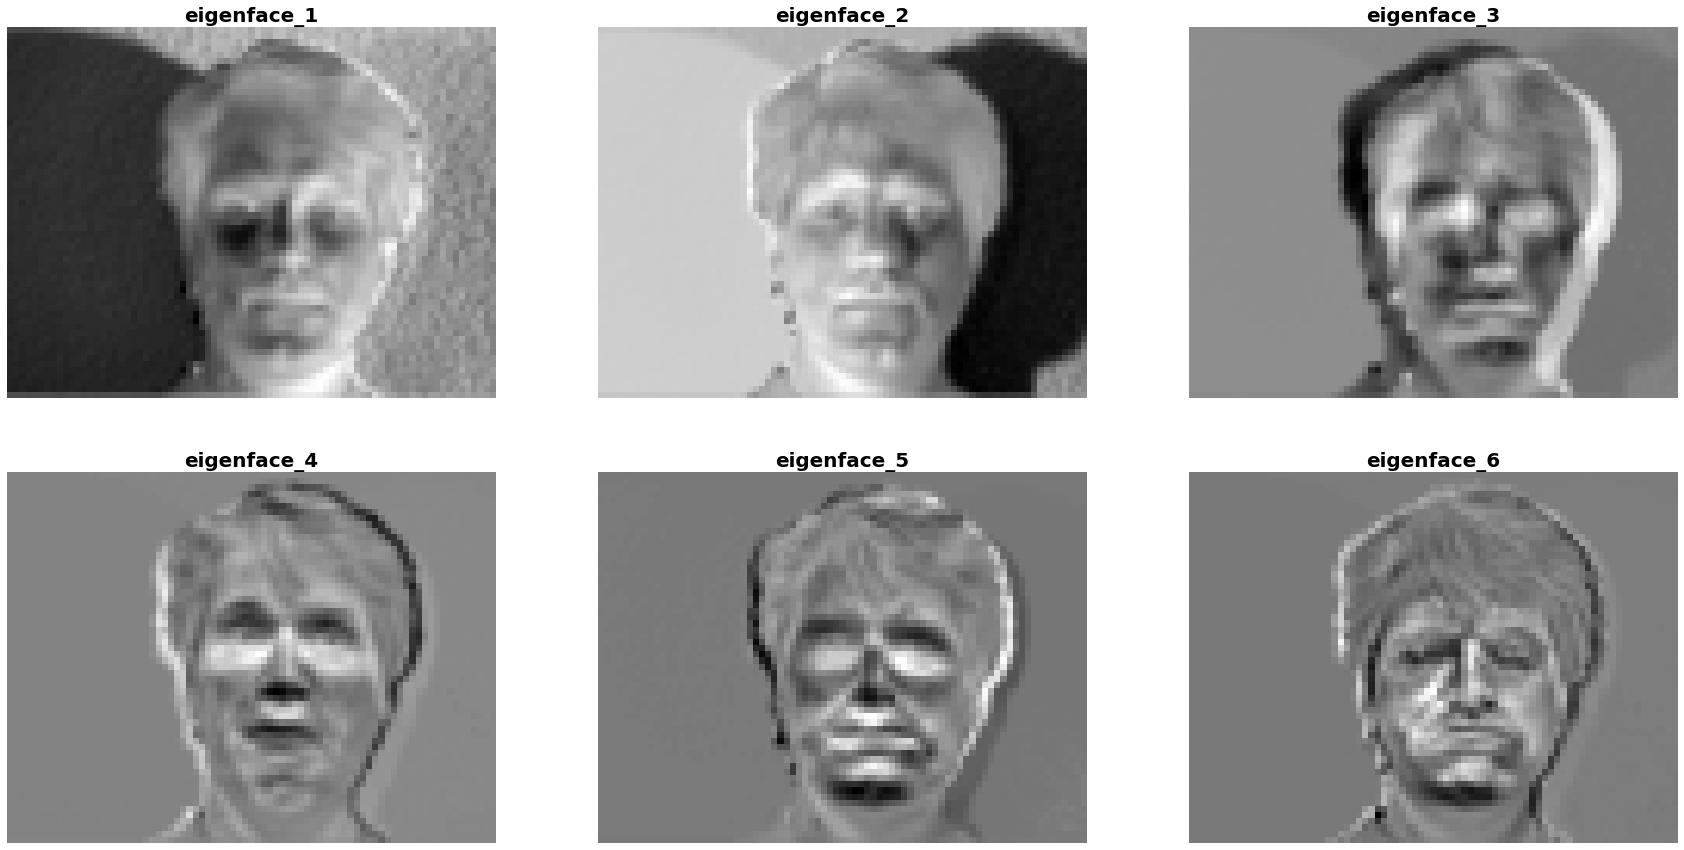

In [49]:
#show the image after compression

intro_fig, ax = subplots(2,3, figsize=(30,15))
ax[0,0].axis('off')
ax[0,0].imshow(eigen_vectors_1[:,0].reshape((60,79)),cmap = 'gray')
ax[0,0].set_title('eigenface_1', fontsize=20, weight='bold')
ax[0,1].axis('off')
ax[0,1].imshow(eigen_vectors_1[:,1].reshape((60,79)),cmap = 'gray')
ax[0,1].set_title('eigenface_2', fontsize=20, weight='bold')
ax[0,2].axis('off')
ax[0,2].imshow(eigen_vectors_1[:,2].reshape((60,79)),cmap = 'gray')
ax[0,2].set_title('eigenface_3', fontsize=20, weight='bold')
ax[1,0].axis('off')
ax[1,0].imshow(eigen_vectors_1[:,3].reshape((60,79)),cmap = 'gray')
ax[1,0].set_title('eigenface_4', fontsize=20, weight='bold')
ax[1,1].axis('off')
ax[1,1].imshow(eigen_vectors_1[:,4].reshape((60,79)),cmap = 'gray')
ax[1,1].set_title('eigenface_5', fontsize=20, weight='bold')
ax[1,2].axis('off')
ax[1,2].imshow(eigen_vectors_1[:,5].reshape((60,79)),cmap = 'gray')
ax[1,2].set_title('eigenface_6', fontsize=20, weight='bold')

#### Visualize Yale face in dataset Subject_2

Text(0.5, 1.0, 'eigenface_6')

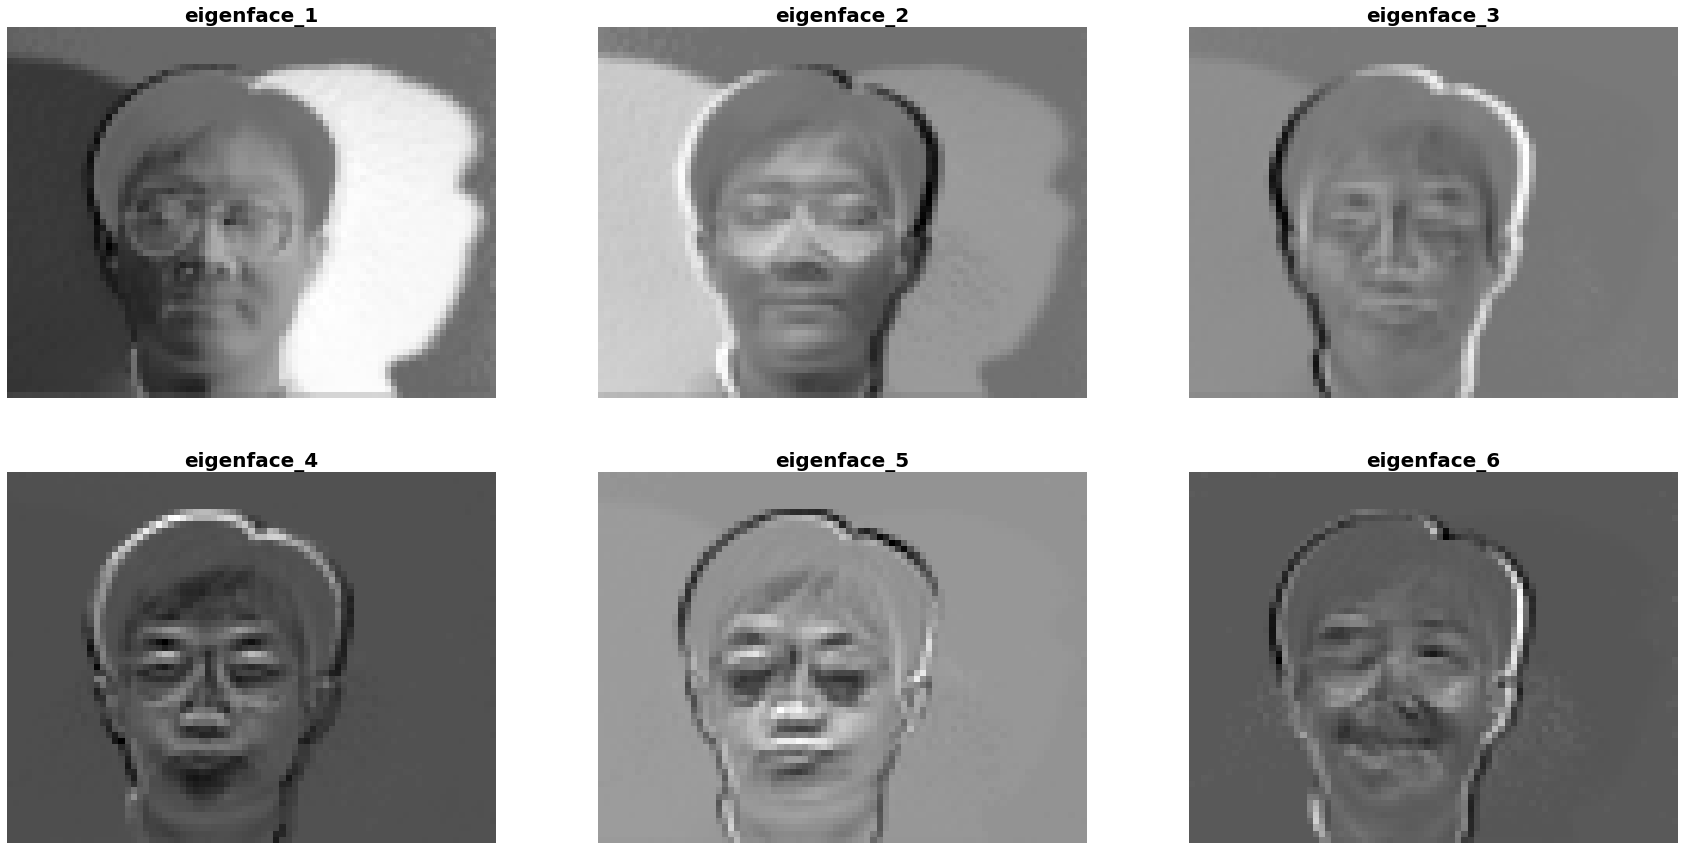

In [53]:
#show the image after compression

intro_fig, ax = subplots(2,3, figsize=(30,15))
ax[0,0].axis('off')
ax[0,0].imshow(eigen_vectors_2[:,0].reshape((60,79)),cmap = 'gray')
ax[0,0].set_title('eigenface_1', fontsize=20, weight='bold')
ax[0,1].axis('off')
ax[0,1].imshow(eigen_vectors_2[:,1].reshape((60,79)),cmap = 'gray')
ax[0,1].set_title('eigenface_2', fontsize=20, weight='bold')
ax[0,2].axis('off')
ax[0,2].imshow(eigen_vectors_2[:,2].reshape((60,79)),cmap = 'gray')
ax[0,2].set_title('eigenface_3', fontsize=20, weight='bold')
ax[1,0].axis('off')
ax[1,0].imshow(eigen_vectors_2[:,3].reshape((60,79)),cmap = 'gray')
ax[1,0].set_title('eigenface_4', fontsize=20, weight='bold')
ax[1,1].axis('off')
ax[1,1].imshow(eigen_vectors_2[:,4].reshape((60,79)),cmap = 'gray')
ax[1,1].set_title('eigenface_5', fontsize=20, weight='bold')
ax[1,2].axis('off')
ax[1,2].imshow(eigen_vectors_2[:,5].reshape((60,79)),cmap = 'gray')
ax[1,2].set_title('eigenface_6', fontsize=20, weight='bold')

#### Observation: From the first six images in both dataset, it is not difficult to realize those are all human faces. In a higher rank of the principal component, more details are displayed in the picture. It also means the top six principal compoenents in this PCA algorithm do capture the most significant information and they are sufficient for face recognition.

#### In comparison, the last eigen_face from the last principal component (shown below) obtains less meaningful information:

Text(0.5, 1.0, 'eigenface_9')

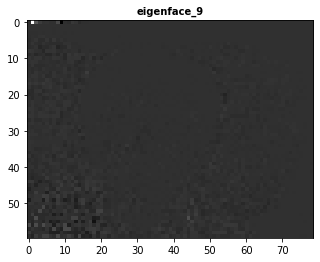

In [58]:
imshow(eigen_vectors_2[:,8].reshape((60,79)),cmap = 'gray')
plt.title('eigenface_9', fontsize=10, weight='bold')

#### Question 2: Perform a simple face recognition task.

Following is the formula for face recognition score:
\begin{equation}
s_{ij} =\frac{\textsf{(eigenface})_i^T \textsf{(test image)}_j}{\|\textsf{(eigenface}_i)\| \cdot\|\textsf{(test image)}_j\|}
\end{equation}


In [63]:
#Read the data
subject_1_test = read_image('data/yalefaces/subject01-test.gif')
subject_2_test = read_image('data/yalefaces/subject02-test.gif')

In [64]:
#Define the top eigenface in PCA calculated previously
top_eigenface_1 = eigen_vectors_1[:,0]
top_eigenface_2 = eigen_vectors_2[:,0]

In [83]:
#Define a function for the face recognition score calculation:
def calculate_score(eigenface,test_image):
    
    assert eigenface.shape == test_image.shape
    
    eigenface_T = np.abs(eigenface.T)
    eigenface_norm = np.linalg.norm(eigenface)
    test_image_norm = np.linalg.norm(test_image)
    
    score = np.dot(eigenface_T,test_image) / (eigenface_norm * test_image_norm)
    
    return score

In [87]:
# Score of top 1 eigenface of subject 1 on subject_1_test:
score_1_1 = calculate_score(top_eigenface_1,subject_1_test)
print("Score of top 1 eigenface of subject 1 on subject_1_test: {:0.4f}.\n".format(score_1_1))

# Score of top 1 eigenface of subject 1 on subject_2_test
score_1_2 = calculate_score(top_eigenface_1,subject_2_test)
print("Score of top 1 eigenface of subject 1 on subject_2_test: {:0.4f}.\n".format(score_1_2))

# Score of top 1 eigenface of subject 2 on subject_1_test:
score_2_1 = calculate_score(top_eigenface_2,subject_1_test)
print("Score of top 1 eigenface of subject 2 on subject_1_test: {:0.4f}.\n".format(score_2_1))

# Score of top 1 eigenface of subject 2 on subject_2_test
score_2_2 = calculate_score(top_eigenface_2,subject_2_test)
print("Score of top 1 eigenface of subject 2 on subject_2_test: {:0.4f}.\n".format(score_2_2))

Score of top 1 eigenface of subject 1 on subject_1_test: 0.8839.

Score of top 1 eigenface of subject 1 on subject_2_test: 0.7185.

Score of top 1 eigenface of subject 2 on subject_1_test: 0.5728.

Score of top 1 eigenface of subject 2 on subject_2_test: 0.7827.



#### Observation: The higher the score it is (close to 1) , that means the more likely the test image should be categorized to the associated subject.

#### Question 3: Explain if face recognition can work well and discuss how we can improve it possibly.

#### Face recognition can work well if the we inccrease the data pool to feed into the PCA algorithm. This can increase the accuracy of the reconition becuase more feautres of the facial expressions can be captured and learned by the machine.